In [1]:
import VQs
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
N = 1000
n = 1000
m = 256
R = np.log2(m)/n
dims = np.arange(n).reshape(-1,1) + 1

In [3]:
Sig2F = np.exp(-0.01*np.arange(n)).reshape(-1,1)
F_train = np.random.randn(n,N)
F_train /= np.std(F_train,axis=1).reshape(-1,1)
F_train *= np.sqrt(Sig2F)
F_test = np.random.randn(n,N*10)
F_test /= np.std(F_test,axis=1).reshape(-1,1)
F_test *= np.sqrt(Sig2F)

In [4]:
# VR-Kmeans training 1:
VRKmeans_train = VQs.VR_Kmeans(m,lmda=1e-6,init_method='Data',num_iter=(10,4),eta=5e-1,gamma_p=0.99)
_,_,_ = VRKmeans_train.run(F_train)
Sig2C_WF = np.diag(VRKmeans_train.S).reshape(-1,1)
Sig2C_VRKmeans1 = np.var(VRKmeans_train.C,axis=1).reshape(-1,1)
del VRKmeans_train

*** iter =  1  (J =  0.0482102076348 ) ****** iter =  2  (J =  0.0424709780608 ) ****** iter =  3  (J =  0.0423028549664 ) ****** iter =  4  (J =  0.0422778102359 ) ****** iter =  5  (J =  0.0422669665785 ) ****** iter =  6  (J =  0.0422613757612 ) ****** iter =  7  (J =  0.0422613596625 ) ****** iter =  8  (J =  0.0422613599946 ) ***

In [5]:
# VR-Kmeans training 2:
VRKmeans_train = VQs.VR_Kmeans(m,lmda=1e-4,init_method='Data',num_iter=(10,4),eta=5e-1,gamma_p=0.99)
_,_,_ = VRKmeans_train.run(F_train)
Sig2C_VRKmeans2 = np.var(VRKmeans_train.C,axis=1).reshape(-1,1)
del VRKmeans_train

******************** 1 *******************************
Cost function value =  0.147153113046
******************** 2 *******************************
Cost function value =  0.0633290854731
******************** 3 *******************************
Cost function value =  0.0531929501315
******************** 4 *******************************
Cost function value =  0.051962393988
******************** 5 *******************************
Cost function value =  0.0517577236316
******************** 6 *******************************
Cost function value =  0.0516885174139
******************** 7 *******************************
Cost function value =  0.0516622076572
******************** 8 *******************************
Cost function value =  0.0516573021454
******************** 9 *******************************
Cost function value =  0.0516540485756
******************** 10 *******************************
Cost function value =  0.0516538440899


In [6]:
# VR-Kmeans training 3:
VRKmeans_train = VQs.VR_Kmeans(m,lmda=1e0,init_method='Data',num_iter=(10,4),eta=5e-1,gamma_p=0.99)
F_out,_,_ = VRKmeans_train.run(F_train)
VRKmeans_Dvect_train = np.var(F_out,axis=1).reshape(-1,1)
Sig2C_VRKmeans3 = np.var(VRKmeans_train.C,axis=1).reshape(-1,1)

******************** 1 *******************************
Cost function value =  1059.95719664
******************** 2 *******************************
Cost function value =  202.985302341
******************** 3 *******************************
Cost function value =  83.5487622339
******************** 4 *******************************
Cost function value =  69.2434563224
******************** 5 *******************************
Cost function value =  68.0279375409
******************** 6 *******************************
Cost function value =  67.9794233738
******************** 7 *******************************
Cost function value =  67.9704110979
******************** 8 *******************************
Cost function value =  67.9626430788
******************** 9 *******************************
Cost function value =  67.9548891283
******************** 10 *******************************
Cost function value =  67.9478258052


In [7]:
# VR-Kmeans testing:
VRKmeans_test = VQs.VQ_unit(VRKmeans_train.C)
F_out,_,_ = VRKmeans_test.run(F_test)
VRKmeans_Dvect_test = np.var(F_out,axis=1).reshape(-1,1)

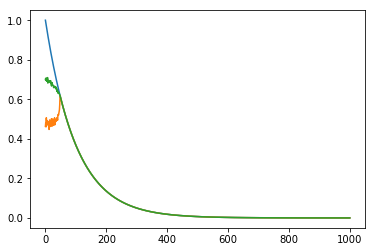

In [8]:
plt.plot(Sig2F)
plt.plot(VRKmeans_Dvect_train)
plt.plot(VRKmeans_Dvect_test)

In [9]:
# Kmeans training:
Kmeans_train = VQs.VR_Kmeans(m,lmda=0,init_method='Data',num_iter=(10,4),eta=5e-1,gamma_p=0.99)
F_out,_,_ = Kmeans_train.run(F_train)
Kmeans_Dvect_train = np.var(F_out,axis=1).reshape(-1,1)
Sig2C_Kmeans = np.var(Kmeans_train.C,axis=1).reshape(-1,1)

******************** 1 *******************************
Cost function value =  0.0471646549623
******************** 2 *******************************
Cost function value =  0.0342789423793
******************** 3 *******************************
Cost function value =  0.0342751611874
******************** 4 *******************************
Cost function value =  0.0342751611874
******************** 5 *******************************
Cost function value =  0.0342751611874


In [10]:
# Kmeans testing:
Kmeans_test = VQs.VQ_unit(Kmeans_train.C)
F_out,_,_ = Kmeans_test.run(F_test)
Kmeans_Dvect_test = np.var(F_out,axis=1).reshape(-1,1)

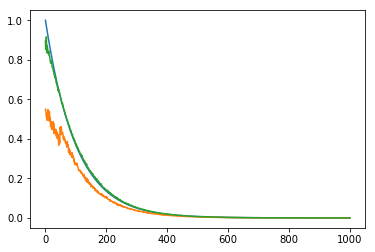

In [11]:
plt.plot(Sig2F)
plt.plot(Kmeans_Dvect_train)
plt.plot(Kmeans_Dvect_test)

In [12]:
curve_dict = {}
curve_dict['Sig2F'] = (dims,Sig2F)
curve_dict['Sig2C_WF'] = (dims,Sig2C_WF)
curve_dict['Sig2C_Kmeans'] = (dims,Sig2C_Kmeans)
curve_dict['Sig2C_VRKmeans1'] = (dims,Sig2C_VRKmeans1)
curve_dict['Sig2C_VRKmeans2'] = (dims,Sig2C_VRKmeans2)
curve_dict['Sig2C_VRKmeans3'] = (dims,Sig2C_VRKmeans3)
curve_dict['DVect_WF'] = (dims,VRKmeans_train.RateAllocation(F_train))
curve_dict['DhatVect_Kmeans'] = (dims,Kmeans_Dvect_train)
curve_dict['DVect_Kmeans'] = (dims,Kmeans_Dvect_test)
curve_dict['DhatVect_VRKmeans'] = (dims,VRKmeans_Dvect_train)
curve_dict['DVect_VRKmeans'] = (dims,VRKmeans_Dvect_test)
curve_dict['gamma'] = (dims,VRKmeans_train.gamma*VRKmeans_train.gamma_p*np.ones((n,1)))
curve_dict['thrsh'] = (len(VRKmeans_train.actv_map)*np.ones((n,1)),np.linspace(0, 1, num=n).reshape(-1,1))

In [13]:
# # # Saving the results for PGFplott:
PGF_path = 'PGF/VR-Kmeans/dat/'
ExpName = 'DimDEMO'
# # # 
for curve_name, curve_xy in curve_dict.items():
    fname = ExpName + '_' + curve_name + '.dat'
    print(fname)
    x = curve_xy[0].astype(float).reshape(-1)
    y = curve_xy[1].astype(float).reshape(-1)
    np.savetxt(PGF_path + fname, np.transpose([x,y]), fmt='%8f', delimiter='   ')

DimDEMO_Sig2C_Kmeans.dat
DimDEMO_DhatVect_Kmeans.dat
DimDEMO_DVect_Kmeans.dat
DimDEMO_DVect_VRKmeans.dat
DimDEMO_Sig2F.dat
DimDEMO_DhatVect_VRKmeans.dat
DimDEMO_Sig2C_VRKmeans1.dat
DimDEMO_DVect_WF.dat
DimDEMO_Sig2C_VRKmeans2.dat
DimDEMO_Sig2C_WF.dat
DimDEMO_gamma.dat
DimDEMO_thrsh.dat
DimDEMO_Sig2C_VRKmeans3.dat
